In [27]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [30]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [31]:
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [32]:
X = data.drop(['class'], axis = 1)
Y = data['class']



In [33]:
rf = RandomForestClassifier(random_state = 0)
parametrs = {'n_estimators' : range(10,51,10), 'max_depth' : range(1,13,2), 
     'min_samples_leaf' : range(1, 8), 'min_samples_split' : range(2,9,2) }
grid_search_cv_clf = GridSearchCV(rf, parametrs, cv = 3)

In [34]:
grid_search_cv_clf.fit(X, Y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 51, 10)})

In [35]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [36]:
rf.fit(X,Y)

RandomForestClassifier(random_state=0)

<AxesSubplot:>

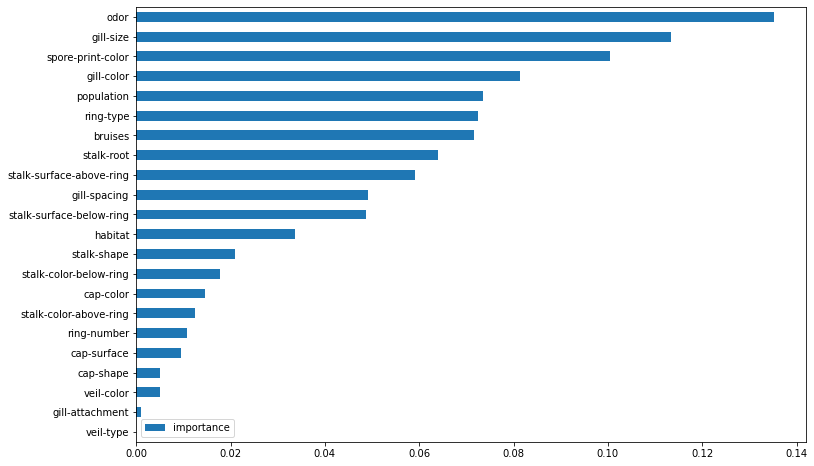

In [37]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [39]:
data_test = pd.read_csv('testing_mush.csv')

In [40]:
data_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [41]:
y_pred = grid_search_cv_clf.best_estimator_.predict(data_test)

In [43]:
y_pred.sum()

976